# **Task-3 Customer Segmentation**

# 1. Load and Clean the Dataset


```
1.1 Import Libraries
1.2 Data From GitHub
1.3 Display First 5 rows
1.4 Dataset Information
1.5 Check the missing values
1.6 Convert TotalCharges to Numeric
1.7 Fill the missing value with median
1.8 Also Check the " " value
1.9 Convert types
```



In [1]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# 1.2 Data From GitHub

# GitHub raw URL
url = 'https://raw.githubusercontent.com/abuthahir17/Dataset/main/Telco_Customer_Churn_Dataset.csv'

# Read CSV file
data = pd.read_csv(url)

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [3]:
# 1.3 Display First 5 rows
print("First Five Rows in the Dataset: \n")
data.head()

First Five Rows in the Dataset: 



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 1.4 Dataset Information
print("Dataset Info:\n")
print(data.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [5]:
# 1.5 Check the missing values
data.replace(" ", None, inplace=True)
print("Missing Value: \n", data.isnull().sum())

Missing Value: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# 1.6 Convert TotalCharges to Numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [7]:
# 1.7 Fill the missing value with median
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [8]:
# 1.8 Also Check the " " value
data.replace(" ", None, inplace=True)
print("Missing Value after Cleaning: \n", data.isnull().sum())

Missing Value after Cleaning: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# 1.9 Convert types
data["Churn"] = data["Churn"].map({"Yes":1, "No":0})

# 2. Create Segments


```
2.1 Tenure Segments
2.2 Monthly Charges Segments
```



In [10]:
# 2.1 Tenure Segments
data["Tenure_Group"] = pd.cut(
    data["tenure"],
    bins=[0, 12, 36, 72],
    labels=["0-1 Year", "1-3 Years", "3-6 Years"]
)

In [11]:
# 2.2 Monthly Charges Segments
data["MonthlyCharges_Group"] = pd.cut(
    data["MonthlyCharges"],
    bins=[0, 35, 70, 120],
    labels=["Low", "Medium", "High"]
)

# 3. Churn Rate Analysis by Segments



```
3.1 Churn by Tenure
3.2 Churn by Monthly Charges
3.3 Churn by Contract Type
```



In [12]:
# 3.1 Churn by Tenure
tenure_churn = data.groupby("Tenure_Group")["Churn"].mean()*100
print("Churn Rate by Tenure Group:\n\n", tenure_churn)

Churn Rate by Tenure Group:

 Tenure_Group
0-1 Year     47.678161
1-3 Years    25.538793
3-6 Years    11.929357
Name: Churn, dtype: float64


/tmp/ipython-input-3411595736.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = data.groupby("Tenure_Group")["Churn"].mean()*100


In [13]:
# 3.2 Churn by Monthly Charges
mcharges_churn = data.groupby("MonthlyCharges_Group")["Churn"].mean()*100
print("Churn Rate by Monthly Charges:\n\n", mcharges_churn)

Churn Rate by Monthly Charges:

 MonthlyCharges_Group
Low       10.893372
Medium    23.942029
High      35.361429
Name: Churn, dtype: float64


/tmp/ipython-input-2774599158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mcharges_churn = data.groupby("MonthlyCharges_Group")["Churn"].mean()*100


In [14]:
# 3.3 Churn by Contract Type
contract_churn = data.groupby("Contract")["Churn"].mean()*100
print("Churn Rate by Contract Type:\n\n", contract_churn)

Churn Rate by Contract Type:

 Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


# 4. Visualizations



```
4.1 Tenure vs Churn
4.2 Monthly Charges vs Churn
4.3 Contract Type vs Churn
4.4 Heatmap for Correlation
```



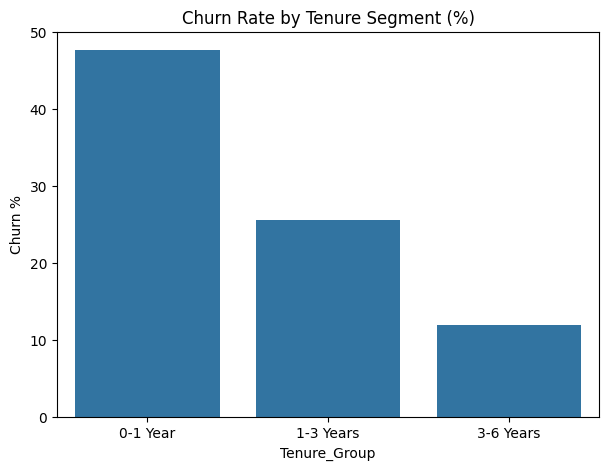

In [15]:
# 4.1 Tenure vs Churn
plt.figure(figsize=(7,5))
sns.barplot(x=tenure_churn.index, y=tenure_churn.values)
plt.title("Churn Rate by Tenure Segment (%)")
plt.ylabel("Churn %")
plt.show()

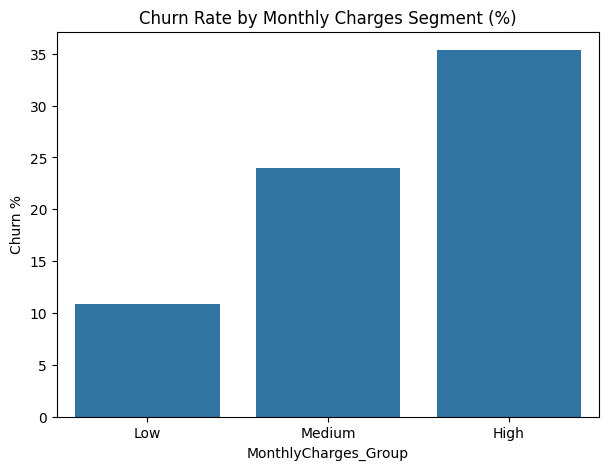

In [16]:
# 4.2 Monthly Charges vs Churn
plt.figure(figsize=(7,5))
sns.barplot(x=mcharges_churn.index, y=mcharges_churn.values)
plt.title("Churn Rate by Monthly Charges Segment (%)")
plt.ylabel("Churn %")
plt.show()

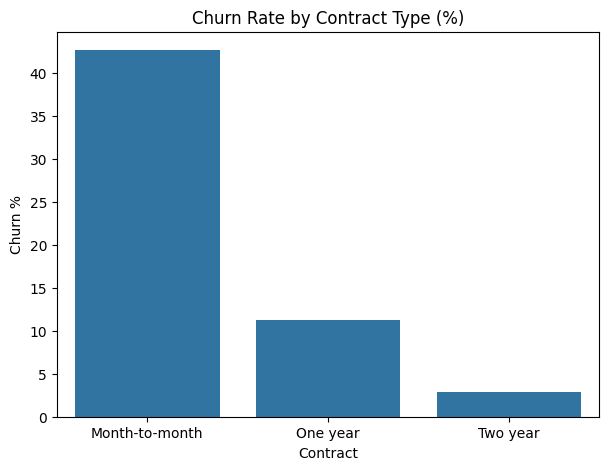

In [17]:
# 4.3 Contract Type vs Churn
plt.figure(figsize=(7,5))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Churn %")
plt.show()

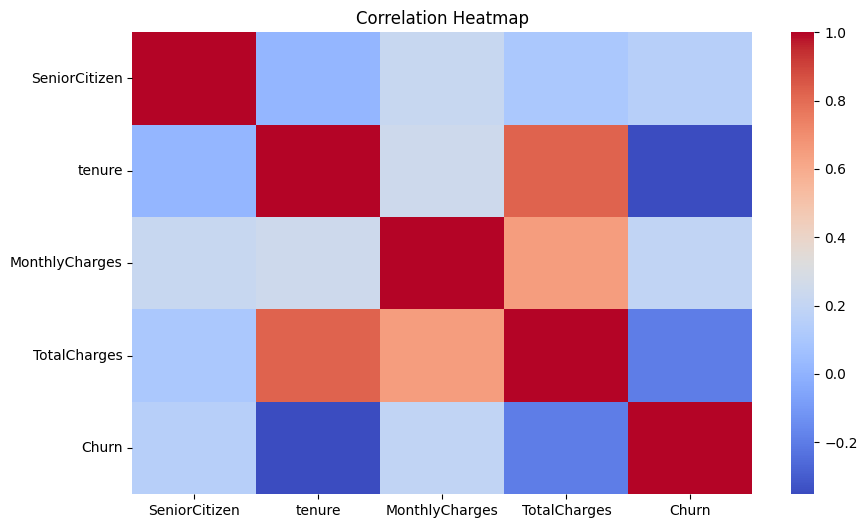

In [18]:
# 4.4 Heatmap for Correlation

# Select only numeric columns
numeric_data = data.select_dtypes(include=["int64", "float64"])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 5. Segment-wise Churn Rate Pivot Table


```
5.1 Churn Rate Pivot Table
```



In [19]:
# 5.1 Churn Rate Pivot Table
pivot = pd.pivot_table(
    data,
    values="Churn",
    index="Tenure_Group",
    columns="Contract",
    aggfunc="mean"
) * 100

print(pivot.round(2))

Contract      Month-to-month  One year  Two year
Tenure_Group                                    
0-1 Year               51.35     10.57      0.00
1-3 Years              35.65      8.05      1.08
3-6 Years              29.64     12.97      3.19


/tmp/ipython-input-3165561121.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


# 6. High-Value Customer Churn Risk Identification


```
6.1 Create Risk Score
6.2 High-value churn-risk customers
6.3 Count of High-Value Churn-Risk Customers
```



In [20]:
# 6.1 Create Risk Score
data["Churn_Risk_Score"] = (
    (data["MonthlyCharges"] / data["MonthlyCharges"].max()) * 40 +
    (data["tenure"] / data["tenure"].max()) * 20 +
    data["Churn"] * 40
).round(2)

data[["customerID", "MonthlyCharges", "tenure", "Churn_Risk_Score"]].head()

,customerID,MonthlyCharges,tenure,Churn_Risk_Score
0,7590-VHVEG,29.85,1,10.33
1,5575-GNVDE,56.95,34,28.63
2,3668-QPYBK,53.85,2,58.69
3,7795-CFOCW,42.30,45,26.75
4,9237-HQITU,70.70,2,64.37


In [21]:
# 6.2 High-value churn-risk customers
high_value_risk = data[
    (data["MonthlyCharges"] > 70) &
    (data["tenure"] > 12) &
    (data["Churn_Risk_Score"] > 60)
]

high_value_risk.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,MonthlyCharges_Group,Churn_Risk_Score
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,1-3 Years,High,83.08
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,3-6 Years,High,88.54
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1,3-6 Years,High,86.52
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,1,1-3 Years,High,85.27
51,9420-LOJKX,Female,0,No,No,15,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Credit card (automatic),99.10,1426.40,1,1-3 Years,High,77.55


In [22]:
# 6.3 Count of High-Value Churn-Risk Customers
print("High-value customers at risk of churn:", len(high_value_risk))

High-value customers at risk of churn: 673


# 7. Customer Segmentation using K-Means



```
7.1 Preparing Data and Creating K-Means Clusters
7.2 Visualizing Customer Clusters
```



In [23]:
# 7.1 Preparing Data and Creating K-Means Clusters

cluster_data = data[["tenure", "MonthlyCharges", "TotalCharges"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_data)

data.groupby("Cluster")[["tenure", "MonthlyCharges"]].mean()

,tenure,MonthlyCharges
Cluster,,
0,53.585850,34.920147
1,59.530987,93.306224
2,10.228873,31.769131
3,15.424868,80.779657


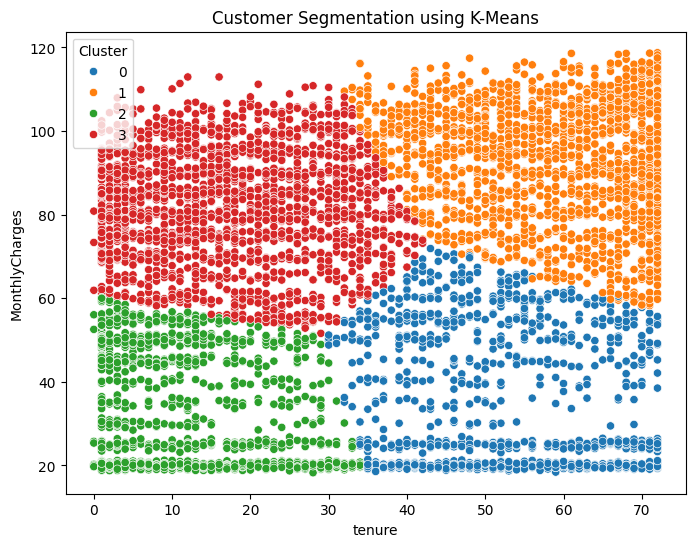

In [24]:
# 7.2 Visualizing Customer Clusters

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data["tenure"],
    y=data["MonthlyCharges"],
    hue=data["Cluster"],
    palette="tab10"
)
plt.title("Customer Segmentation using K-Means")
plt.show()

# 8. Final Summary Table for All Segments


```
8.1 Report Generating
8.2 Download Final Summary Report (CSV)
```



In [25]:
# 8.1 Report Generating

final_report = data.groupby(
    ["Cluster", "Tenure_Group", "MonthlyCharges_Group", "Contract"]
).agg(
    Customers=("customerID", "count"),
    Avg_Tenure=("tenure", "mean"),
    Avg_Charges=("MonthlyCharges", "mean"),
    Churn_Rate=("Churn", "mean"),
    High_Risk=("Churn_Risk_Score", lambda x: (x > 70).sum())
).round(2)

print("\nFinal Summary Report:\n")
final_report


Final Summary Report:



/tmp/ipython-input-3740777881.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_report = data.groupby(


Customers  \
Cluster Tenure_Group MonthlyCharges_Group Contract                    
0       0-1 Year     Low                  Month-to-month          0   
                                          One year                0   
                                          Two year                0   
                     Medium               Month-to-month          0   
                                          One year                0   
...                                                             ...   
3       3-6 Years    Medium               One year                4   
                                          Two year                2   
                     High                 Month-to-month         31   
                                          One year               25   
                                          Two year                4   

                                                          Avg_Tenure  \
Cluster Tenure_Group MonthlyCharges_Group Contract                     
0       0-1 Year     Low                  Month-to-month         NaN   
                                          One year               NaN   
                                          Two year               NaN   
                     Medium               Month-to-month         NaN   
                                          One year               NaN   
...                                                              ...   
3       3-6 Years    Medium               One year             37.25   
                                          Two year             37.00   
                     High                 Month-to-month       38.58   
                                          One year             38.92   
                                          Two year             39.00   

                                                          Avg_Charges  \
Cluster Tenure_Group MonthlyCharges_Group Contract                      
0       0-1 Year     Low                  Month-to-month          NaN   
                                          One year                NaN   
                                          Two year                NaN   
                     Medium               Month-to-month          NaN   
                                          One year                NaN   
...                                                               ...   
3       3-6 Years    Medium               One year              67.30   
                                          Two year              64.20   
                     High                 Month-to-month        78.90   
                                          One year              77.43   
                                          Two year              81.32   

                                                          Churn_Rate  \
Cluster Tenure_Group MonthlyCharges_Group Contract                     
0       0-1 Year     Low                  Month-to-month         NaN   
                                          One year               NaN   
                                          Two year               NaN   
                     Medium               Month-to-month         NaN   
                                          One year               NaN   
...                                                              ...   
3       3-6 Years    Medium               One year              0.00   
                                          Two year              0.00   
                     High                 Month-to-month        0.39   
                                          One year              0.24   
                                          Two year              0.25   

                                                          High_Risk  
Cluster Tenure_Group MonthlyCharges_Group Contract                   
0       0-1 Year     Low                  Month-to-month        NaN  
                                          One year              NaN  
                              

In [ ]:
# 8.2 Download Final Summary Report (CSV)
from google.colab import files
final_report.to_csv("Task3_Final_Report.csv", index=True)
files.download("Task3_Final_Report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>